In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import sklearn

C:\Users\Admin\Desktop\projects\loan_approval_predictor\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("devzohaib/eligibility-prediction-for-loan")

print("Path to dataset files:", path)

100%|██████████| 7.80k/7.80k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\devzohaib\eligibility-prediction-for-loan\versions\1


In [19]:
dataset = f"{path}/Loan_Data.csv"
#import os
#dataset = os.path.join(path, Loan_Data.csv)

In [20]:
dataset = pd.read_csv(dataset)

In [21]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
dataset.shape

(614, 13)

In [23]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
pd.crosstab(dataset["LoanAmount"], dataset["Credit_History"])

Credit_History,0.0,1.0
LoanAmount,,
9.0,0,1
17.0,0,1
25.0,0,2
26.0,0,1
30.0,0,2
...,...,...
496.0,0,1
500.0,0,1
570.0,0,1


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

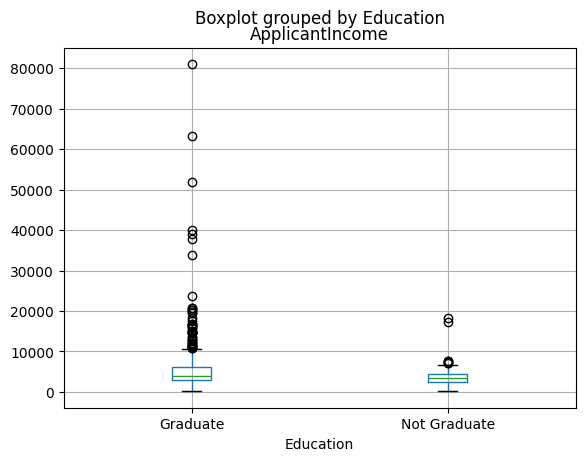

In [29]:
dataset.boxplot(column="ApplicantIncome", by="Education")

<Axes: title={'center': 'LoanAmount'}, xlabel='Education'>

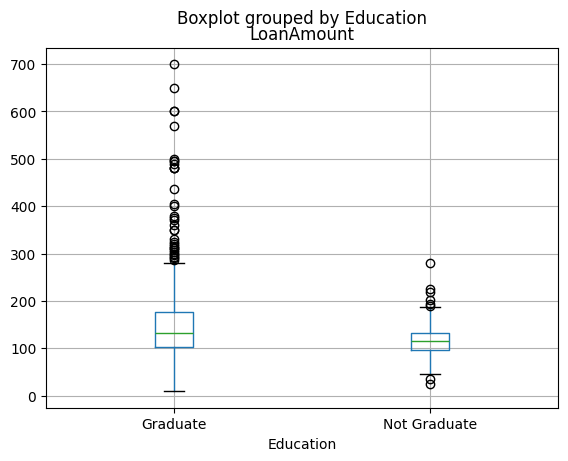

In [31]:
dataset.boxplot(column="LoanAmount", by="Education")

<Axes: >

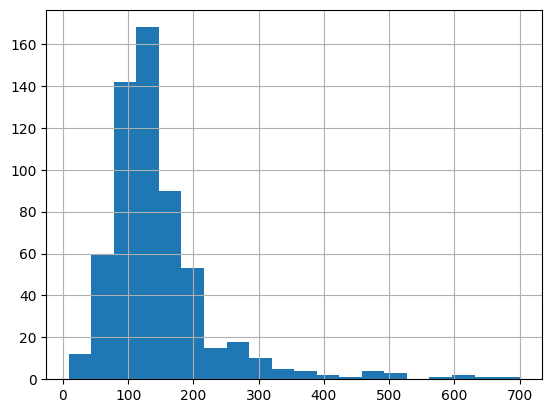

In [35]:
dataset["LoanAmount"].hist(bins=20)

<Axes: >

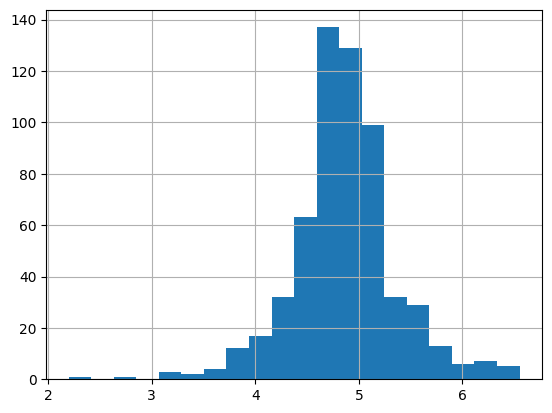

In [36]:
#normalise the loan_amount column using log
dataset['LoanAmount_norm'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_norm'].hist(bins=20)

In [38]:
dataset.isna().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_norm      22
dtype: int64

In [62]:
#use mode value of the non-missing to fill null value for all categorical values (0 or 1)
#and mean for missing numeric values
dataset['Gender'] = dataset['Gender']= dataset['Gender'].fillna(dataset['Gender'].mode()[0])



In [61]:
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])

In [60]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
#dataset.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_28444\2038371818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)


In [59]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_28444\2026000613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)


In [55]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_norm = dataset.LoanAmount_norm.fillna(dataset.LoanAmount_norm.mean())

In [56]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_28444\3414302034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)


In [57]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28444\3057768767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)


In [66]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_norm      0
dtype: int64

CoapplicantIncome

Missing values have been handled.
For columns that have categorical values, .mode() was used to handle the missing values
such that the most common value is inputted into the missing data point
If there are multiple common value in the data category, .mode()[0] is used to assign
the first value. inplace=True is used to reassign the value to the original datapoint.

For columns with numeric values, mean() or median can be used to handle the missing value
mean() has been used in this instance.

There can be instances where the datapoint / record that is missing is deleted from the dataset

In [72]:
#create a total income for all applicants and normalise the total income using log

dataset['Total_income'] = dataset['CoapplicantIncome']+dataset['ApplicantIncome']
dataset['Total_income_log'] = np.log(dataset['Total_income'])

<Axes: >

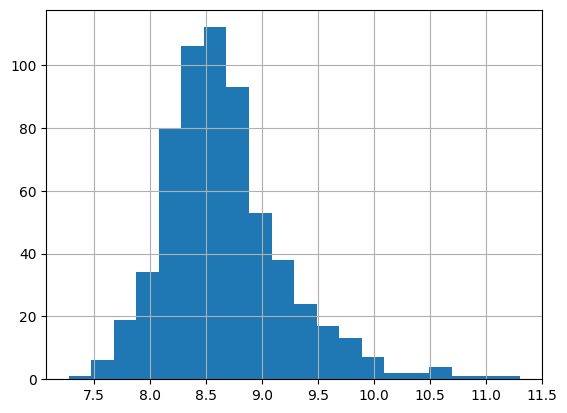

In [73]:
#visualise the normalised total income using histogram
dataset['Total_income_log'].hist(bins=20)

In [74]:
#visualise the dataset to see
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_norm,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [88]:
#categorise the columns in the data to dependent and non-dependent variable
#the dependent variables would be the loan status, if the loan would be approved or not while the other columns are the independent variables
#import numpy as np X= dataset.iloc[:,np.r_[0:5,8:11,13:15]].values
X= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y= dataset.iloc[:,12].values

In [89]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      shape=(614, 8), dtype=object)

In [83]:
X

array([['LP001002', 'Male', 'No', ..., 1.0, 4.857444178729352, 5849.0],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 4.852030263919617, 6091.0],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 5.53338948872752, 8312.0],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 5.231108616854587, 7583.0],
       ['LP002990', 'Female', 'No', ..., 0.0, 4.890349128221754, 4583.0]],
      shape=(614, 10), dtype=object)

In [84]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [85]:
#split dataset into train and test using 80:20 for train size and test size
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
X_train

array([[67, 1, 1, ..., 1.0, 4.875197323201151, 5858.0],
       [426, 1, 0, ..., 1.0, 5.278114659230517, 11250.0],
       [360, 1, 1, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [289, 1, 1, ..., 1.0, 5.298317366548036, 8334.0],
       [156, 1, 1, ..., 1.0, 5.075173815233827, 6033.0],
       [445, 0, 1, ..., 1.0, 5.204006687076795, 6486.0]],
      shape=(491, 10), dtype=object)

In [86]:
print(X_train.shape, y_train.shape)

(491, 10) (491,)


In [87]:
#convert categorical values into numeric format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
for i in range(0, 6):
    X_train[:, i] = le.fit_transform(X_train[:, i])

In [93]:
X_train

array([[67, 1, 1, ..., 1.0, 4.875197323201151, 5858.0],
       [426, 1, 0, ..., 1.0, 5.278114659230517, 11250.0],
       [360, 1, 1, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [289, 1, 1, ..., 1.0, 5.298317366548036, 8334.0],
       [156, 1, 1, ..., 1.0, 5.075173815233827, 6033.0],
       [445, 0, 1, ..., 1.0, 5.204006687076795, 6486.0]],
      shape=(491, 10), dtype=object)

In [ ]:
#X_train[:, 7]

In [94]:
leNew_y = LabelEncoder()


In [95]:
y_train = leNew_y.fit_transform(y_train)

In [96]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [100]:
#X_test[:, 7] = le.fit_transform(X_test[:,7])

In [98]:
for i in range(0, 6):
    X_test[:, i]= le.fit_transform(X_test[:, i])
#X_test = le.fit_transform(X_test)

In [99]:
X_test

array([[93, 1, 0, ..., 1.0, 4.430816798843313, 7085.0],
       [15, 0, 0, ..., 1.0, 4.718498871295094, 4230.0],
       [108, 1, 1, ..., 1.0, 5.780743515792329, 10039.0],
       ...,
       [57, 1, 1, ..., 1.0, 6.077642243349034, 14583.0],
       [95, 1, 1, ..., 0.0, 4.248495242049359, 4611.0],
       [59, 1, 1, ..., 1.0, 4.564348191467836, 3428.0]],
      shape=(123, 10), dtype=object)

In [102]:
y_test = leNew_y.transform(y_test)

In [103]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [104]:
#scale the data for the dependent variable to improve prediction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [105]:
#use ML algorithm to make prediction

from sklearn.tree import DecisionTreeClassifier
DT_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0 )
DT_Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [106]:
#predict using test data
y_pred = DT_Classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [108]:
cm

array([[12, 21],
       [ 8, 82]])

In [109]:
from sklearn import metrics
print(f"The accuracy of decision tree classifier is {metrics.accuracy_score(y_test, y_pred)}")

The accuracy of decision tree classifier is 0.7642276422764228


In [120]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', random_state=0) #linear & poly used accuracy remains same
svc.fit(X_train, y_train)


SVC(kernel='poly', random_state=0)

In [121]:
y_pred = svc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [122]:
print(f"The accuracy of SVM classifier is {metrics.accuracy_score(y_test, y_pred)}")

The accuracy of SVM classifier is 0.8292682926829268


In [123]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [124]:
y_pred = NB.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [125]:
print(f"The accuracy of naive bayes classifier is {metrics.accuracy_score(y_test, y_pred)}")

The accuracy of naive bayes classifier is 0.8373983739837398
